# Pregunta de parcial 1 Regresion logistica 2
Diego Roberto Arancibia Delgado
https://github.com/drArancibiaDelgado/sis420-/tree/main/Laboratorios/Lab%202

In [143]:
# from google.colab import drive
# drive.mount('/content/drive')

In [144]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

from sklearn.model_selection import train_test_split
import tabulate



# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

##  Regresion Logistica



In [145]:
# Cargar datos
data = pd.read_csv("secondary_data.csv",delimiter=";")
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [147]:
#aqui tratamos los valores para convertirlos en binarios
data.loc[:, 'class'] = data['class'].map({'e': 0, 'p': 1}).fillna(-1).astype(int)
#cap-shape (n): bell=b, conical=c, convex=x, flat=f,sunken=s, spherical=p, others=o 
data.loc[:, 'cap-shape'] = data['cap-shape'].map({'b': 0, 'c': 1, 'x': 2, 'f': 3, 's': 4, 'p': 5, 'o': 6}).fillna(-1).astype(int)
#cap-surface (n): fibrous=f, grooves=g, scaly=y, smooth=s,shiny=h, leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e 
data.loc[:, 'cap-surface'] = data['cap-surface'].map({'f': 0, 'g': 1, 'y': 2, 's': 3, 'h': 4, 'l': 5, 'k': 6, 't': 7, 'w': 8, 'e': 9}).fillna(-1).astype(int)
#cap-color (n): brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
data.loc[:, 'cap-color'] = data['cap-color'].map({'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9, 'l': 10, 'o': 11, 'k': 12}).fillna(-1).astype(int)
# does-bruise-bleed (n): bruises-or-bleeding=t,no=f
data.loc[:, 'does-bruise-or-bleed'] = data['does-bruise-or-bleed'].map({'t': 0, 'f': 1}).fillna(-1).astype(int)
#gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
data.loc[:, 'gill-attachment'] = data['gill-attachment'].map({'a': 0, 'x': 1, 'd': 2, 'e': 3, 's': 4, 'p': 5, 'f': 6, '?': 7}).fillna(-1).astype(int)
#gill-spacing (n): close=c, distant=d, none=f
data.loc[:, 'gill-spacing'] = data['gill-spacing'].map({'c': 0, 'd': 1, 'f': 2}).fillna(-1).astype(int)
#gill-color (n): see cap-color + none=f
data.loc[:, 'gill-color'] = data['gill-color'].map({'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9, 'l': 10, 'o': 11, 'k': 12, 'f': 13}).fillna(-1).astype(int)
#stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
data.loc[:, 'stem-root'] = data['stem-root'].map({'b': 0, 's': 1, 'c': 2, 'u': 3, 'e': 4, 'z': 5, 'r': 6}).fillna(-1).astype(int)
#stem-surface (n): see cap-surface + none=f
data.loc[:, 'stem-surface'] = data['stem-surface'].map({'f': 0, 'g': 1, 'y': 2, 's': 3, 'h': 4, 'l': 5, 'k': 6, 't': 7, 'w': 8, 'e': 9}).fillna(-1).astype(int)
#stem-color (n): see cap-color + none=f
data.loc[:, 'stem-color'] = data['stem-color'].map({'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9, 'l': 10, 'o': 11, 'k': 12, 'f': 13}).fillna(-1).astype(int)
#veil-type (n): partial=p, universal=u
data.loc[:, 'veil-type'] = data['veil-type'].map({'p': 0, 'u': 1}).fillna(-1).astype(int)
#veil-color (n): see cap-color + none=f
data.loc[:, 'veil-color'] = data['veil-color'].map({'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9, 'l': 10, 'o': 11, 'k': 12}).fillna(-1).astype(int)
# has-ring (n): ring=t, none=f
data.loc[:, 'has-ring'] = data['has-ring'].map({'t': 0, 'f': 1}).fillna(-1).astype(int)
# ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
data.loc[:, 'ring-type'] = data['ring-type'].map({'c': 0, 'e': 1, 'r': 2, 'g': 3, 'l': 4, 'p': 5, 's': 6, 'z': 7, 'y': 8, 'm': 9, 'f': 10, '?': 11}).fillna(-1).astype(int)
#spore-print-color (n): see cap color
data.loc[:, 'spore-print-color'] = data['spore-print-color'].map({'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9, 'l': 10, 'o': 11, 'k': 12}).fillna(-1).astype(int)
#habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u, waste=w, woods=d
data.loc[:, 'habitat'] = data['habitat'].map({'g': 0, 'l': 1, 'm': 2, 'p': 3, 'h': 4, 'u': 5, 'w': 6, 'd': 7}).fillna(-1).astype(int)
# season (n): spring=s, summer=u, autumn=a, winter=w
data.loc[:, 'season'] = data['season'].map({'s': 0, 'u': 1, 'a': 2, 'w': 3}).fillna(-1).astype(int)


In [148]:
#aqui se dropeo las columnas que no se utilizaran, dado a que tienen valores que volvia el modelo inestable
data = data.drop(['cap-diameter','stem-height','stem-width'], axis=1)
data

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,2,1,11,1,3,-1,8,1,2,8,1,8,0,3,-1,7,3
1,1,2,1,11,1,3,-1,8,1,2,8,1,8,0,3,-1,7,1
2,1,2,1,11,1,3,-1,8,1,2,8,1,8,0,3,-1,7,3
3,1,3,4,7,1,3,-1,8,1,2,8,1,8,0,5,-1,7,3
4,1,2,4,11,1,3,-1,8,1,2,8,1,8,0,5,-1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,4,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,2
61065,1,3,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,2
61066,1,4,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,1
61067,1,3,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,1


In [149]:
print(data.info())
print(data['class'].dtype) 
#puedes convertir todas las columnas a enteros de la siguiente manera
data = data.astype(int)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 61069 non-null  object
 1   cap-shape             61069 non-null  object
 2   cap-surface           61069 non-null  object
 3   cap-color             61069 non-null  object
 4   does-bruise-or-bleed  61069 non-null  object
 5   gill-attachment       61069 non-null  object
 6   gill-spacing          61069 non-null  object
 7   gill-color            61069 non-null  object
 8   stem-root             61069 non-null  object
 9   stem-surface          61069 non-null  object
 10  stem-color            61069 non-null  object
 11  veil-type             61069 non-null  object
 12  veil-color            61069 non-null  object
 13  has-ring              61069 non-null  object
 14  ring-type             61069 non-null  object
 15  spore-print-color     61069 non-null

In [150]:
#informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   class                 61069 non-null  int32
 1   cap-shape             61069 non-null  int32
 2   cap-surface           61069 non-null  int32
 3   cap-color             61069 non-null  int32
 4   does-bruise-or-bleed  61069 non-null  int32
 5   gill-attachment       61069 non-null  int32
 6   gill-spacing          61069 non-null  int32
 7   gill-color            61069 non-null  int32
 8   stem-root             61069 non-null  int32
 9   stem-surface          61069 non-null  int32
 10  stem-color            61069 non-null  int32
 11  veil-type             61069 non-null  int32
 12  veil-color            61069 non-null  int32
 13  has-ring              61069 non-null  int32
 14  ring-type             61069 non-null  int32
 15  spore-print-color     61069 non-null  int32
 16  habi

In [151]:
data


,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,2,1,11,1,3,-1,8,1,2,8,1,8,0,3,-1,7,3
1,1,2,1,11,1,3,-1,8,1,2,8,1,8,0,3,-1,7,1
2,1,2,1,11,1,3,-1,8,1,2,8,1,8,0,3,-1,7,3
3,1,3,4,7,1,3,-1,8,1,2,8,1,8,0,5,-1,7,3
4,1,2,4,11,1,3,-1,8,1,2,8,1,8,0,5,-1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,4,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,2
61065,1,3,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,2
61066,1,4,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,1
61067,1,3,3,9,1,6,2,13,-1,-1,9,-1,-1,1,10,-1,7,1


In [152]:
#separacion de datos
# Se separa el conjunto de datos en dos subconjuntos: entrenamiento y prueba
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=25)

X_test = test_dataset.drop(['class'], axis=1).values
y_test = test_dataset['class'].values

X_train = train_dataset.drop(['class'], axis=1).values
y_train = train_dataset['class'].values

In [153]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


<a id="section1"></a>
###  Implementacion

#### Fución Sigmoidea



In [154]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))
    
    return g

Calculando la sigmoide

In [155]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [156]:
# Agrega una columna de unos a X. La función agrega una columna de unos al principio de la matriz X
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [157]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# print(X_norm)
print('{:>8s}{:>8s}{:>10s}{:>15s}{:>8s}{:>10s}{:>8s}{:>8s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'y'))
print('-'*200)
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}{:8.3f}{:8.3f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], 
                                                                                 X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], 
                                                                                 X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], 
                                                                                 y_train[i]))

  X[:,0] X[:, 1]   X[:, 2]        X[:, 3] X[:, 4]   X[:, 5] X[:, 6]       y
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  -0.413  -1.096    -1.059         -2.183         -1.289         -0.966          0.369   0.556  -0.573   0.595     4.252          2.732         -1.736         -1.737         -0.296   0.590   0.539   0.000
  -0.413   0.124     0.378          0.458         -0.361         -0.966         -1.725  -0.300  -0.573   0.595    -0.235         -0.357          0.576          0.468         -0.296   0.590  -0.881   0.000
  -0.413  -1.096     1.096         -2.183          1.494         -0.966         -0.678  -0.300  -0.573   0.845    -0.235         -0.357          0.576          0.468         -0.296   0.590   0.539   0.000
  -0.413   0.124    -1.059          0.458          0.567          0.196         -0.416  -0.300  -0.573  -1.4

<a id="section2"></a>
#### Función de Costo y Gradiente



In [158]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m_train, n_train = X_train.shape
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X_ready)

[[ 1.         -0.41265674 -1.09552092 ... -0.29584088  0.59029708
   0.53904255]
 [ 1.         -0.41265674  0.12354749 ... -0.29584088  0.59029708
  -0.88131901]
 [ 1.         -0.41265674 -1.09552092 ... -0.29584088  0.59029708
   0.53904255]
 ...
 [ 1.          0.99185386 -1.09552092 ... -0.29584088  0.59029708
  -0.88131901]
 [ 1.         -0.41265674  0.12354749 ... -0.29584088  0.59029708
   0.53904255]
 [ 1.          0.28959856 -1.09552092 ... -0.29584088  0.59029708
  -0.88131901]]


In [159]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    return J

In [160]:
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        
        gradiente = (1 / m) * (h - y).dot(X)
        regurizacion = (lambda_ / m) * theta[1:]
        
        theta[0] -= alpha * gradiente[0]
        theta[1:] -= alpha * gradiente[1:] + regurizacion
        
        # theta[1:] = theta[1:] - (alpha / m) * (h - y).dot(X[:, 1:]) + (lambda_ / m) * theta[1:]
        # theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.22383463 -0.00621101  0.01005997  0.02463458  0.0038451  -0.02886683
 -0.00638429 -0.00930159  0.02580962  0.00723575 -0.00105706  0.01028603
 -0.00319307 -0.01084389  0.00954907  0.01801488 -0.01067226 -0.0068426 ]


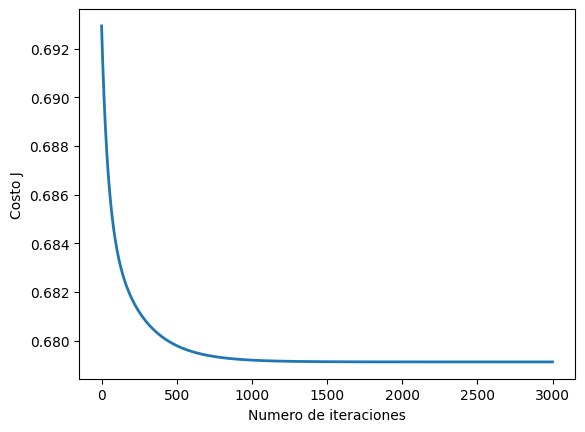

In [161]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.009

num_iters = 3000
lambda_ = 1000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(len(X_ready[0]))

theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# X_array = [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46]
# aprueba = sigmoid(np.dot(X_array, theta))  

Validaciones

In [162]:
X_test = (X_test - mu) / sigma
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

y_pred = []
for i in range(len(X_test)):
    y_pred.append(sigmoid(np.dot(X_test[i], theta.T)))
    
y_pred = np.array(y_pred)

y_umbral = (y_pred >= 0.5).astype(int)

print("la precision del modelo es: ", np.mean(y_umbral == y_test) * 100)


la precision del modelo es:  55.15801539217292
